# Task 1 - Approximating functions

In [1]:
from utils import *

import numpy as np
import itertools

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

Let's load and plot the data of the task:

In [2]:
linearData = np.loadtxt('./data/linear_function_data.txt')
nonLinearData = np.loadtxt('./data/nonlinear_function_data.txt')

In [3]:
print(linearData.shape)
print(nonLinearData.shape)

(1000, 2)
(1000, 2)


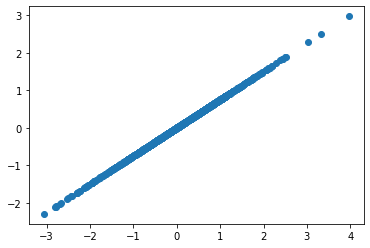

In [4]:
plt.scatter(linearData[:, 0], linearData[:, 1])
plt.show()

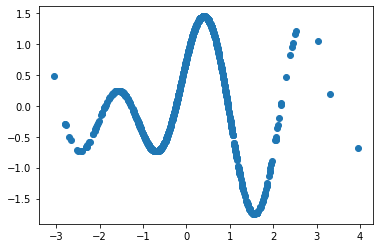

In [5]:
plt.scatter(nonLinearData[:, 0], nonLinearData[:, 1])
plt.show()

## 1st Part - Approximate linear data with a linear function

First, let's approximate the function of the linear data with a linear function and plot it:

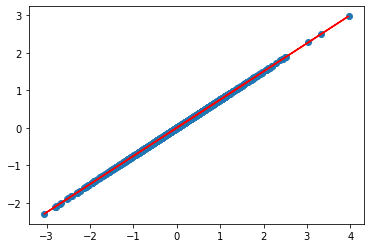

In [6]:
# Perform least-squares minimization (y = ax + b)
a, b = leastSquaresMinimization(linearData)

# Evaluate x from the data using the obtained function
ySol = np.polyval([a, b], linearData[:, 0])

# Plot
plt.scatter(linearData[:, 0], linearData[:, 1])
plt.plot(linearData[:, 0], ySol, 'r')
plt.show()

## 2nd Part - Approximate non linear data with a linear function

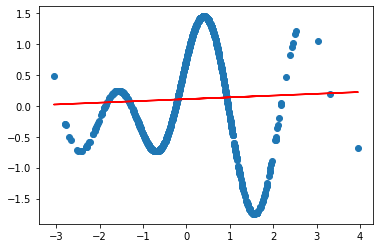

In [7]:
# Perform least-squares minimization (y = ax + b)
a, b = leastSquaresMinimization(nonLinearData)

# Evaluate x from the data using the obtained function
ySol = np.polyval([a, b], nonLinearData[:, 0])

# Plot
plt.scatter(linearData[:, 0], nonLinearData[:, 1])
plt.plot(linearData[:, 0], ySol, 'r')
plt.show()

## 3rd Part - Approximate non linear data with a combination of radial functions

Let's use the Grid Search strategy with Mean Squared Error (MSE) to find the best combination of L and epsilon:

In [8]:
possibleL = list(range(5, 15))
possibleEpsilon = np.round(np.arange(0.50, 1.50, 0.10), 2)

minimumMSE = 10000
mimumL = None
minimumEpsilon = None
for L, epsilon in itertools.product(possibleL, possibleEpsilon):
    ySol = approximateNonLinearFunction(nonLinearData, L, epsilon)
    
    mse = sum(map(lambda x : pow(x,2), nonLinearData[:, 1] - ySol)) / len(nonLinearData[:, 1])
    
    if mse < minimumMSE:
        minimumL = L
        minimumEpsilon = epsilon
        minimumMSE = mse
        
print("The selected parameters are L = {} and Epsilon = {} with MSE = {}".format(minimumL, minimumEpsilon, minimumMSE))

The selected parameters are L = 10 and Epsilon = 1.0 with MSE = 0.00011319383868277533


We have that the combination with less MSE is L = 10 and $\epsilon$ = 1.0. Let's recover and plot the function together with the original data:

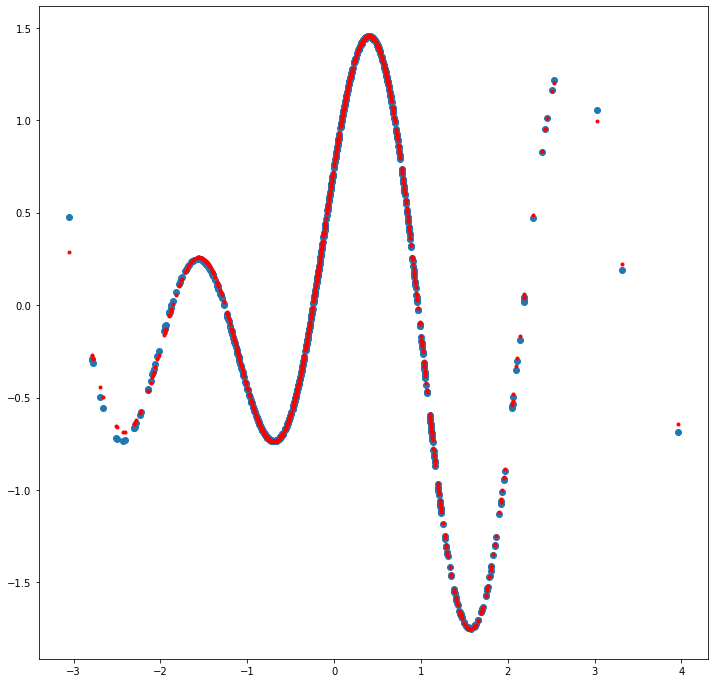

In [9]:
ySol = approximateNonLinearFunction(nonLinearData, 10, 1)

fig = plt.figure(figsize=(12,12))
plt.scatter(nonLinearData[:, 0], nonLinearData[:, 1])
plt.plot(nonLinearData[:, 0], ySol, '.r')
plt.show()